<h1>Q1<h/1>  

* #### QUELS ANNÉES...
* #### comportent le PLUS / le MOINS d’anomalies signalées...  
* #### PAR ARRONDISSEMENT ?

In [45]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy
import csv

In [46]:
df = pandas.read_csv("dansMaRue_src.csv", sep = ';', header = 0)
df.head()

,ID_DECLARATION,TYPE_DECLARATION,SOUS TYPE DECLARATION,ADRESSE,CODE POSTAL,VILLE,ARRONDISSEMENT,CONSEIL DE QUARTIER,DATE DECLARATION,ANNEE_DECLARATION,MOIS_DECLARATION,OUTIL SOURCE,INTERVENANT,ID_DMR,geo_shape,geo_point_2d
0,8908,"Graffitis, tags, affiches et autocollants","Graffitis sur mur, façade sur rue, pont","54 boulevard Saint-Michel, 75006 PARIS",75006,Paris 6,6,ODEON,2020-11-06,2020,11,Back Office,graffitis,B2020K008908,"{""coordinates"": [2.341156843849894, 48.8482361...","48.84823612301676,2.341156843849894"
1,9667,Propreté,Déchets et/ou salissures divers,"5 Place Charles Michels, 75015 PARIS",75015,Paris 15,15,EMERIAU - ZOLA,2020-11-06,2020,11,IOPage DMR Paris.fr application,DPE-STPP-DT,A2020K009667,"{""coordinates"": [2.285102602581971, 48.8469049...","48.84690499771227,2.285102602581971"
2,10501,Propreté,Déchets et/ou salissures divers,"224 Boulevard Saint-Germain, 75007 PARIS",75007,Paris 7,7,SAINT - THOMAS D'AQUIN,2020-11-07,2020,11,Androï,DPE-STPP-DT,G2020K010501,"{""coordinates"": [2.327545398485348, 48.8554230...","48.85542300090138,2.327545398485348"
3,10504,Objets abandonnés,Autres objets encombrants abandonnés,"17 Rue Dombasle, 75015 PARIS",75015,Paris 15,15,VAUGIRARD - PARC DES EXPOSITIONS,2020-11-07,2020,11,Androï,Ramen en tant que prestataire de DansMaRue,G2020K010504,"{""coordinates"": [2.297122497971316, 48.8362800...","48.83628000074566,2.297122497971316"
4,23631,"Graffitis, tags, affiches et autocollants","Affiches, autocollants ou graffitis sur autres...","29 Rue du Pont Neuf, 75001 PARIS",75001,Paris 1,1,LES HALLES,2020-11-14,2020,11,Androï,La Poste,G2020K023631,"{""coordinates"": [2.34483960419365, 48.86116400...","48.861164001292295,2.34483960419365"


### CI-DESSOUS J'ANALYSE MON DATAFRAME ###

In [47]:
df.shape

(886688, 16)

In [48]:
df.columns

Index(['ID_DECLARATION', 'TYPE_DECLARATION', 'SOUS TYPE DECLARATION',
       'ADRESSE', 'CODE POSTAL', 'VILLE', 'ARRONDISSEMENT',
       'CONSEIL DE QUARTIER', 'DATE DECLARATION', 'ANNEE_DECLARATION',
       'MOIS_DECLARATION', 'OUTIL SOURCE', 'INTERVENANT', 'ID_DMR',
       'geo_shape', 'geo_point_2d'],
      dtype='object')

In [49]:
df.columns.values

array(['ID_DECLARATION', 'TYPE_DECLARATION', 'SOUS TYPE DECLARATION',
       'ADRESSE', 'CODE POSTAL', 'VILLE', 'ARRONDISSEMENT',
       'CONSEIL DE QUARTIER', 'DATE DECLARATION', 'ANNEE_DECLARATION',
       'MOIS_DECLARATION', 'OUTIL SOURCE', 'INTERVENANT', 'ID_DMR',
       'geo_shape', 'geo_point_2d'], dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886688 entries, 0 to 886687
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID_DECLARATION         886688 non-null  int64 
 1   TYPE_DECLARATION       886688 non-null  object
 2   SOUS TYPE DECLARATION  886688 non-null  object
 3   ADRESSE                886688 non-null  object
 4   CODE POSTAL            886688 non-null  int64 
 5   VILLE                  886688 non-null  object
 6   ARRONDISSEMENT         886688 non-null  int64 
 7   CONSEIL DE QUARTIER    886622 non-null  object
 8   DATE DECLARATION       886688 non-null  object
 9   ANNEE_DECLARATION      886688 non-null  int64 
 10  MOIS_DECLARATION       886688 non-null  int64 
 11  OUTIL SOURCE           886688 non-null  object
 12  INTERVENANT            884775 non-null  object
 13  ID_DMR                 886688 non-null  object
 14  geo_shape              886688 non-null  object
 15  

In [51]:
df.describe(include='all')

,ID_DECLARATION,TYPE_DECLARATION,SOUS TYPE DECLARATION,ADRESSE,CODE POSTAL,VILLE,ARRONDISSEMENT,CONSEIL DE QUARTIER,DATE DECLARATION,ANNEE_DECLARATION,MOIS_DECLARATION,OUTIL SOURCE,INTERVENANT,ID_DMR,geo_shape,geo_point_2d
count,886688.000000,886688,886688,886688,886688.000000,886688,886688.000000,886622,886688,886688.000000,886688.000000,886688,884775,886688,886688,886688
unique,NaN,10,336,187906,NaN,17,NaN,125,395,NaN,NaN,4,46,886688,507404,507404
top,NaN,Objets abandonnés,Autres objets encombrants abandonnés,"44 Rue de Paradis, 75010 PARIS",NaN,Paris 18,NaN,PORTE SAINT-DENIS - PARADIS,2021-09-13,NaN,NaN,Androï,Ramen en tant que prestataire de DansMaRue,B2020K008908,"{""coordinates"": [2.350211598621044, 48.8755499...","48.875549995961094,2.350211598621044"
freq,NaN,317457,252826,753,NaN,97187,NaN,20559,3410,NaN,NaN,473011,286688,1,502,502
mean,35864.562790,NaN,NaN,NaN,75013.055146,NaN,13.186124,NaN,NaN,2020.844076,6.849708,NaN,NaN,NaN,NaN,NaN
std,21960.917615,NaN,NaN,NaN,5.360357,NaN,5.085013,NaN,NaN,0.362784,3.252870,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,75001.000000,NaN,1.000000,NaN,NaN,2020.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,17444.000000,NaN,NaN,NaN,75010.000000,NaN,10.000000,NaN,NaN,2021.000000,4.000000,NaN,NaN,NaN,NaN,NaN
50%,34707.000000,NaN,NaN,NaN,75014.000000,NaN,14.000000,NaN,NaN,2021.000000,7.000000,NaN,NaN,NaN,NaN,NaN
75%,51945.000000,NaN,NaN,NaN,75018.000000,NaN,18.000000,NaN,NaN,2021.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [52]:
df[['ID_DECLARATION','TYPE_DECLARATION']]

,ID_DECLARATION,TYPE_DECLARATION
0,8908,"Graffitis, tags, affiches et autocollants"
1,9667,Propreté
2,10501,Propreté
3,10504,Objets abandonnés
4,23631,"Graffitis, tags, affiches et autocollants"
...,...,...
886683,24272,"Graffitis, tags, affiches et autocollants"
886684,24276,"Autos, motos, vélos..."
886685,24291,Activités commerciales et professionnelles
886686,25066,"Graffitis, tags, affiches et autocollants"


### JE SELECTIONNE LES COLONNES QUI M'INTERESSE ###

In [53]:
df = df[['TYPE_DECLARATION','ARRONDISSEMENT'
         ,'ANNEE_DECLARATION', 'MOIS_DECLARATION','geo_point_2d']]
df

,TYPE_DECLARATION,ARRONDISSEMENT,ANNEE_DECLARATION,MOIS_DECLARATION,geo_point_2d
0,"Graffitis, tags, affiches et autocollants",6,2020,11,"48.84823612301676,2.341156843849894"
1,Propreté,15,2020,11,"48.84690499771227,2.285102602581971"
2,Propreté,7,2020,11,"48.85542300090138,2.327545398485348"
3,Objets abandonnés,15,2020,11,"48.83628000074566,2.297122497971316"
4,"Graffitis, tags, affiches et autocollants",1,2020,11,"48.861164001292295,2.34483960419365"
...,...,...,...,...,...
886683,"Graffitis, tags, affiches et autocollants",4,2021,10,"48.85455299568289,2.35543369404891"
886684,"Autos, motos, vélos...",13,2021,10,"48.826186998912384,2.35876729662111"
886685,Activités commerciales et professionnelles,5,2021,10,"48.851413995078936,2.3481270946515203"
886686,"Graffitis, tags, affiches et autocollants",20,2021,10,"48.874915995573595,2.398191504241558"


### JE COMPTE LE NOMBRE D'ANOMALIE DISTINCTES ###

In [54]:
df['TYPE_DECLARATION'].value_counts()

Objets abandonnés                             317457
Graffitis, tags, affiches et autocollants     235706
Autos, motos, vélos...                        121734
Propreté                                      117075
Voirie et espace public                        29872
Activités commerciales et professionnelles     27451
Mobiliers urbains                              16438
Éclairage / Électricité                         8677
Arbres, végétaux et animaux                     8650
Eau                                             3628
Name: TYPE_DECLARATION, dtype: int64

### JE COMPTE LE NOMBRE D'ANOMALIE DISTINCTES SUR L'ANNEE 2020 ###

In [55]:
(df['ANNEE_DECLARATION']==2020).value_counts()   # VRAI 138256

False    748432
True     138256
Name: ANNEE_DECLARATION, dtype: int64

### JE COMPTE LE NOMBRE D'ANOMALIE DISTINCTES SUR L'ANNEE 2021 ###

In [56]:
(df['ANNEE_DECLARATION']==2021).value_counts()   # VRAI 748432

True     748432
False    138256
Name: ANNEE_DECLARATION, dtype: int64

### JE COMPTE ET STOCKE NOMBRE ANOMALIES ###

In [57]:
anomalies_nb = df['TYPE_DECLARATION'].value_counts()
anomalies_nb

Objets abandonnés                             317457
Graffitis, tags, affiches et autocollants     235706
Autos, motos, vélos...                        121734
Propreté                                      117075
Voirie et espace public                        29872
Activités commerciales et professionnelles     27451
Mobiliers urbains                              16438
Éclairage / Électricité                         8677
Arbres, végétaux et animaux                     8650
Eau                                             3628
Name: TYPE_DECLARATION, dtype: int64

### STOCKAGE DANS UN DICO AFIN D'EXTRAIRE LE MIN ET LE MAX ###

In [58]:
anomalies_dic = { k:v for k,v in anomalies_nb.items() }
anomalies_dic

{'Objets abandonnés': 317457,
 'Graffitis, tags, affiches et autocollants': 235706,
 'Autos, motos, vélos...': 121734,
 'Propreté': 117075,
 'Voirie et espace public': 29872,
 'Activités commerciales et professionnelles': 27451,
 'Mobiliers urbains': 16438,
 'Éclairage / Électricité': 8677,
 'Arbres, végétaux et animaux': 8650,
 'Eau': 3628}

### EXTRACTION MIN() et MAX() DES ANOMALIES, VIA LES FONCTIONS PYTHON ###

In [59]:
min(anomalies_dic.values())

3628

In [60]:
max(anomalies_dic.values())

317457

## ---------------------------- ##
### CROSSTAB ANNEES / ARRONDISSEMENTS ###

In [61]:
an_arr = pandas.crosstab( df.ANNEE_DECLARATION, df.ARRONDISSEMENT )
an_arr

ARRONDISSEMENT,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
ANNEE_DECLARATION,,,,,,,,,,,,,,,,,,,,
2020,2187,2112,2739,3031,4181,2517,2227,2773,5017,12579,10731,9050,6918,5284,13456,6222,9669,14240,11082,12241
2021,11514,16385,17370,16197,21945,10825,11140,18783,28588,64883,63840,48766,38178,27161,66715,34656,48237,82911,56142,64196


### CROSSTAB ANNEES par ARRONDISSEMENTS  et par TYPE_DECLARATION ###

In [62]:
q1 = pandas.crosstab( [ df['ANNEE_DECLARATION'], df['ARRONDISSEMENT'] ], df['TYPE_DECLARATION'] )
q1

TYPE_DECLARATION                  Activités commerciales et professionnelles  \
ANNEE_DECLARATION ARRONDISSEMENT                                               
2020              1                                                       81   
                  2                                                       86   
                  3                                                       42   
                  4                                                       44   
                  5                                                       62   
                  6                                                       24   
                  7                                                       17   
                  8                                                       35   
                  9                                                      112   
                  10                                                     147   
                  11                                                     141   
                  12                                                     116   
                  13                                                      51   
                  14                                                      49   
                  15                                                      60   
                  16                                                      34   
                  17                                                      67   
                  18                                                     119   
                  19                                                      27   
                  20                                                      38   
2021              1                                                     1234   
                  2                                                     2205   
                  3                                                      883   
                  4                                                      862   
                  5                                                      913   
                  6                                                      840   
                  7                                                      346   
                  8                                                      615   
                  9                                                     2074   
                  10                                                    3487   
                  11                                                    2419   
                  12                                                     943   
                  13                                                     469   
                  14                                                     593   
                  15                                                     947   
                  16                                                     665   
                  17                                                    1831   
                  18                                                    3241   
                  19                                                     447   
                  20                                                    1085   

TYPE_DECLARATION                  Arbres, végétaux et animaux  \
ANNEE_DECLARATION ARRONDISSEMENT                                
2020              1                                         8   
                  2                                        12   
                  3                                         7   
                  4                                        34   
                  5                                        21   
                  6                                        15   
                  7                                        10   
                  8                                   

### ECHANTILLON ###

In [63]:
q1.iloc[0:1,:]

,TYPE_DECLARATION,Activités commerciales et professionnelles,"Arbres, végétaux et animaux","Autos, motos, vélos...",Eau,"Graffitis, tags, affiches et autocollants",Mobiliers urbains,Objets abandonnés,Propreté,Voirie et espace public,Éclairage / Électricité
ANNEE_DECLARATION,ARRONDISSEMENT,,,,,,,,,,
2020,1,81,8,335,8,1065,53,352,185,74,26


### JE FAIS UNE MOYENNE SUR LES ANOMALIES SUR CHAQUE LIGNE ###

In [64]:
def moyenne_ligne(x):
    return(x.mean())

### DEJA SUR UNE LIGNE ###

In [65]:
q1.iloc[0:1 , : ].apply(moyenne_ligne,axis=1) # axis = 1 C'EST MA RANGEE

ANNEE_DECLARATION  ARRONDISSEMENT
2020               1                 218.7
dtype: float64

### PUIS SUR TOUTES LES LIGNES ###

In [66]:
q1.iloc[:,:].apply( moyenne_ligne, axis = 1 )

ANNEE_DECLARATION  ARRONDISSEMENT
2020               1                  218.7
                   2                  211.2
                   3                  273.9
                   4                  303.1
                   5                  418.1
                   6                  251.7
                   7                  222.7
                   8                  277.3
                   9                  501.7
                   10                1257.9
                   11                1073.1
                   12                 905.0
                   13                 691.8
                   14                 528.4
                   15                1345.6
                   16                 622.2
                   17                 966.9
                   18                1424.0
                   19                1108.2
                   20                1224.1
2021               1                 1151.4
                   2                 1638.

In [67]:
### JE FAIS UNE SOMME DES ANOMALIES ###

In [68]:
def somme_ligne(x):
    return(numpy.sum(x))

In [69]:
q1_som = q1.iloc[:,:].apply( somme_ligne, axis = 1 )
q1_som

ANNEE_DECLARATION  ARRONDISSEMENT
2020               1                  2187
                   2                  2112
                   3                  2739
                   4                  3031
                   5                  4181
                   6                  2517
                   7                  2227
                   8                  2773
                   9                  5017
                   10                12579
                   11                10731
                   12                 9050
                   13                 6918
                   14                 5284
                   15                13456
                   16                 6222
                   17                 9669
                   18                14240
                   19                11082
                   20                12241
2021               1                 11514
                   2                 16385
                   3

In [70]:
q1_som.shape

(40,)

In [71]:
q1_som.ndim

1

### JE VEUX UN POURCENTAGE avec nomalize, MAIS CELA ME DONNE UN POURCENTAGE SUR CHAQUE ANOMALIE ###
### EN FAITE ICI CETTE REQUETTE EST INUTILE CAR LORSQU'ON GENERE UN GRAPHE, LE POURCENTAGE EST GENERE DE FACON AUTO ###

In [72]:
q1_pourc = pandas.crosstab( [ df['ANNEE_DECLARATION'], df['ARRONDISSEMENT'] ], df['TYPE_DECLARATION'],  normalize='index' )     
q1_pourc

TYPE_DECLARATION                  Activités commerciales et professionnelles  \
ANNEE_DECLARATION ARRONDISSEMENT                                               
2020              1                                                 0.037037   
                  2                                                 0.040720   
                  3                                                 0.015334   
                  4                                                 0.014517   
                  5                                                 0.014829   
                  6                                                 0.009535   
                  7                                                 0.007634   
                  8                                                 0.012622   
                  9                                                 0.022324   
                  10                                                0.011686   
                  11                                                0.013140   
                  12                                                0.012818   
                  13                                                0.007372   
                  14                                                0.009273   
                  15                                                0.004459   
                  16                                                0.005464   
                  17                                                0.006929   
                  18                                                0.008357   
                  19                                                0.002436   
                  20                                                0.003104   
2021              1                                                 0.107174   
                  2                                                 0.134574   
                  3                                                 0.050835   
                  4                                                 0.053220   
                  5                                                 0.041604   
                  6                                                 0.077598   
                  7                                                 0.031059   
                  8                                                 0.032742   
                  9                                                 0.072548   
                  10                                                0.053743   
                  11                                                0.037892   
                  12                                                0.019337   
                  13                                                0.012285   
                  14                                                0.021833   
                  15                                                0.014195   
                  16                                                0.019189   
                  17                                                0.037958   
                  18                                                0.039090   
                  19                                                0.007962   
                  20                                                0.016901   

TYPE_DECLARATION                  Arbres, végétaux et animaux  \
ANNEE_DECLARATION ARRONDISSEMENT                                
2020              1                                  0.003658   
                  2                                  0.005682   
                  3                                  0.002556   
                  4                                  0.011217   
                  5                                  0.005023   
                  6                                  0.005959   
                  7                                  0.004490   
                  8                                  0

### JE RECUPERE TOUTES LES ANOMALIES 2020 2021 PAR ARRONDISSEMENT MAIS CELA RESTE INUTILE ICI JE PENSE ###

In [73]:
for i in q1_som:
    print(i)

2187
2112
2739
3031
4181
2517
2227
2773
5017
12579
10731
9050
6918
5284
13456
6222
9669
14240
11082
12241
11514
16385
17370
16197
21945
10825
11140
18783
28588
64883
63840
48766
38178
27161
66715
34656
48237
82911
56142
64196


### BOUCLE QUI AFFICHE  CLE  ET  VALEUR ###

In [74]:
for k,v in q1_som.items():
    print(f"{k}:{v}")

(2020, 1):2187
(2020, 2):2112
(2020, 3):2739
(2020, 4):3031
(2020, 5):4181
(2020, 6):2517
(2020, 7):2227
(2020, 8):2773
(2020, 9):5017
(2020, 10):12579
(2020, 11):10731
(2020, 12):9050
(2020, 13):6918
(2020, 14):5284
(2020, 15):13456
(2020, 16):6222
(2020, 17):9669
(2020, 18):14240
(2020, 19):11082
(2020, 20):12241
(2021, 1):11514
(2021, 2):16385
(2021, 3):17370
(2021, 4):16197
(2021, 5):21945
(2021, 6):10825
(2021, 7):11140
(2021, 8):18783
(2021, 9):28588
(2021, 10):64883
(2021, 11):63840
(2021, 12):48766
(2021, 13):38178
(2021, 14):27161
(2021, 15):66715
(2021, 16):34656
(2021, 17):48237
(2021, 18):82911
(2021, 19):56142
(2021, 20):64196


In [75]:
un_dic = { k:v for k,v in q1_som.items() }
un_dic

{(2020, 1): 2187,
 (2020, 2): 2112,
 (2020, 3): 2739,
 (2020, 4): 3031,
 (2020, 5): 4181,
 (2020, 6): 2517,
 (2020, 7): 2227,
 (2020, 8): 2773,
 (2020, 9): 5017,
 (2020, 10): 12579,
 (2020, 11): 10731,
 (2020, 12): 9050,
 (2020, 13): 6918,
 (2020, 14): 5284,
 (2020, 15): 13456,
 (2020, 16): 6222,
 (2020, 17): 9669,
 (2020, 18): 14240,
 (2020, 19): 11082,
 (2020, 20): 12241,
 (2021, 1): 11514,
 (2021, 2): 16385,
 (2021, 3): 17370,
 (2021, 4): 16197,
 (2021, 5): 21945,
 (2021, 6): 10825,
 (2021, 7): 11140,
 (2021, 8): 18783,
 (2021, 9): 28588,
 (2021, 10): 64883,
 (2021, 11): 63840,
 (2021, 12): 48766,
 (2021, 13): 38178,
 (2021, 14): 27161,
 (2021, 15): 66715,
 (2021, 16): 34656,
 (2021, 17): 48237,
 (2021, 18): 82911,
 (2021, 19): 56142,
 (2021, 20): 64196}

In [76]:
type(un_dic)

dict

### CERTES MAIS JE NE VAIS PAS ME SERVIR DE CE DIC ICI ###

### BOUCLE QUI AFFICHE LES CLES VALEURS EN 2020 ###

In [77]:
cle2020 = []
val2020 = []
for k,v in q1_som.items():
    if k[0]==2020:    
        cle2020.append(k)
        val2020.append(v)
        
cle2020

[(2020, 1),
 (2020, 2),
 (2020, 3),
 (2020, 4),
 (2020, 5),
 (2020, 6),
 (2020, 7),
 (2020, 8),
 (2020, 9),
 (2020, 10),
 (2020, 11),
 (2020, 12),
 (2020, 13),
 (2020, 14),
 (2020, 15),
 (2020, 16),
 (2020, 17),
 (2020, 18),
 (2020, 19),
 (2020, 20)]

In [78]:
val2020

[2187,
 2112,
 2739,
 3031,
 4181,
 2517,
 2227,
 2773,
 5017,
 12579,
 10731,
 9050,
 6918,
 5284,
 13456,
 6222,
 9669,
 14240,
 11082,
 12241]

In [79]:
type(val2020)

list

### TOP J'AI 2 LISTES POUR MES FUTUR CAMEMBERTS ###

### CODE POUR TITRE LEGENDE CAMEMBERT, JE VEUX AFFICHER LE MIN ET LE MAX ANOMALIES ###

In [80]:
val2020_sort = numpy.sort(val2020)
print("sort :",val2020_sort)

val2020_min = val2020_sort[0]
print("sort min :",val2020_min)

val2020_max = val2020_sort[-1]
print("sort max :",val2020_max)

sort : [ 2112  2187  2227  2517  2739  2773  3031  4181  5017  5284  6222  6918
  9050  9669 10731 11082 12241 12579 13456 14240]
sort min : 2112
sort max : 14240


### JE M'APPERCOIS QUE CLE2020 EST UN TUPLE ET QUE J'AI L'ANNE ET L'ARRONDISSEMENT DU STYLE tuple(2020, 1) ET CELA NE M'ARRANGE PAS. J'AI BESOIN UNIQUEMENT DE L'ARRONDISSEMENT CAR L'ANNE JE L'ECRIRAIS DANS LE TITRE. CELA CHARGERA MOINS LE CAMEMBERT. LE CODE CODE CI-DESSOUS RECUPERE L'ELEMENT 2 DE LA LISTE ET LE STOCK DANS UNE NOUVELLE VAR ###

In [81]:
cle2020arrond = []
for k in cle2020:
    cle2020arrond.append(k[1])
    
cle2020arrond

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

## --------------------------- ##
### DEBUT CAMEMBERT 2020 ###

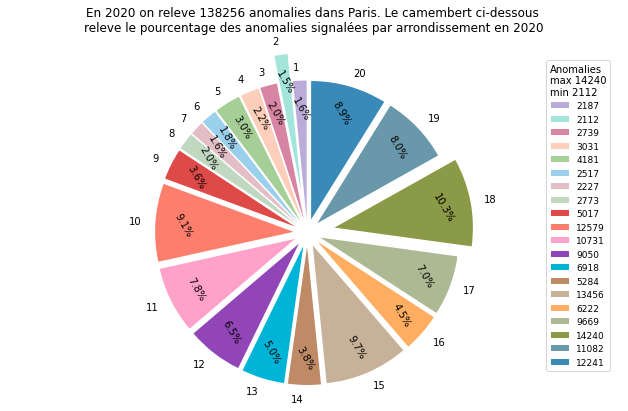

In [82]:
# ---- 2020 ----
eclate = (0.1, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1)

colors = ['#BAABDA','#A3E4DB','#D885A3','#FDCEB9','#A6CF98',
          '#9AD0EC','#E3BEC6','#C0D8C0','#DD4A48','#FE7E6D',
          '#FFA1C9','#9145B6','#00B4D8','#BF8B67','#C7B198',
          '#FFAD60','#ACB992','#8B9A46','#6998AB','#398AB9',]

fig1, ax1 = plt.subplots( figsize=(11, 6.7) )

camemb = ax1.pie( val2020, labels=cle2020arrond,
         explode=eclate,
         colors=colors,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance = 0.8,     # les pourcentages
         labeldistance = 1.1,   # les arrondissements
         )

# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb[2]
for text in x:
    text.set_rotation(-60)

ax1.axis('equal')

ax1.set_title(f"En 2020 on releve {sum(val2020)} anomalies dans Paris. Le camembert ci-dessous \n\
releve le pourcentage des anomalies signalées par arrondissement en 2020").set_fontsize(12)

#plt.suptitle('Sur-titre')
#li = [ i for i in range(20)]
plt.legend(val2020, # numpy.sort(val2020),      # la méthode .sort() de python ne fonctionne pas ici car j'ai un array donc j'utilise NUMPY
                                                # FINALEMENT J'ABANDONNE LE TRIE DES NOMBRES CAR LES COULEURS NE SONT PAS SYNCHRONISEE
           title=f"Anomalies\nmax {val2020_max}\nmin {val2020_min}",
           prop={'size': 9},                    # TAILLE DE MA LEGENDE
           loc=9, bbox_to_anchor=(0.93,0.95)    # CES ELEMENTS ME POSTIONNENT EN BAS MA LEGENDE
           )

plt.savefig('img/Q1_pie2020.png')

plt.show()

### FIN CAMEMBERT 2020 ###
## --------------------------- ##

## --------------------------- ##
### DEBUT CAMEMBERT 2021 ###

### BOUCLE QUI AFFICHE LES CLES VALEURS EN 2021 ###

In [83]:
cle2021 = []
val2021 = []
for k,v in q1_som.items():
    if k[0]==2021:    
        cle2021.append(k)
        val2021.append(v)

cle2021

[(2021, 1),
 (2021, 2),
 (2021, 3),
 (2021, 4),
 (2021, 5),
 (2021, 6),
 (2021, 7),
 (2021, 8),
 (2021, 9),
 (2021, 10),
 (2021, 11),
 (2021, 12),
 (2021, 13),
 (2021, 14),
 (2021, 15),
 (2021, 16),
 (2021, 17),
 (2021, 18),
 (2021, 19),
 (2021, 20)]

In [84]:
val2021

[11514,
 16385,
 17370,
 16197,
 21945,
 10825,
 11140,
 18783,
 28588,
 64883,
 63840,
 48766,
 38178,
 27161,
 66715,
 34656,
 48237,
 82911,
 56142,
 64196]

### CODE POUR TITRE LEGENDE CAMEMBERT, JE VEUX AFFICHER LE MIN ET LE MAX ANOMALIES ###

In [85]:
val2021_sort = numpy.sort(val2021)
print("sort :",val2021_sort)

val2021_min = val2021_sort[0]   # PRMIERE
print("sort min :",val2021_min)

val2021_max = val2021_sort[-1]  # DERNIERE
print("sort max :",val2021_max)

sort : [10825 11140 11514 16197 16385 17370 18783 21945 27161 28588 34656 38178
 48237 48766 56142 63840 64196 64883 66715 82911]
sort min : 10825
sort max : 82911


### CETTE BOUCLE M'EXTRAIT LES ARRONDISSEMENT CAR JE NE VEUX PAS AFFICHER LES ANNEES DANS MON CAMEMBERT ###

In [86]:
cle2021arrond = []
for k in cle2021:
    cle2021arrond.append(k[1])

cle2021arrond

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

### CODE CAMEMBERT 2021 ###

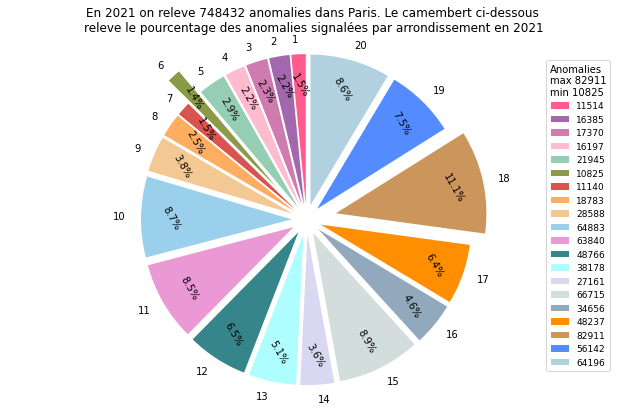

In [87]:
# ------------------ 2021 -------------------
eclate2 = (0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1)

colors2 = ['#FF5C8D','#A267AC','#CE7BB0','#FFBCD1','#96CEB4',
          '#8B9A46','#D9534F','#FFAD60','#F3C892','#9AD0EC',
          '#EA99D5','#35858B','#AEFEFF','#D9D7F1','#D3DEDC',
          '#92A9BD','#FF8E00','#CA965C','#548CFF','#B1D0E0',]

fig2, ax2 = plt.subplots(figsize=(11, 6.7))

camemb2 = ax2.pie( val2021, labels=cle2021arrond,
         explode = eclate2,
         colors=colors2,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance = 0.8,     # les pourcentages
         labeldistance = 1.1,   # les arrondissements
         )

# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb2[2]
for text in x:
    text.set_rotation(-60)

ax2.axis('equal')

ax2.set_title(f"En 2021 on releve {sum(val2021)} anomalies dans Paris. Le camembert ci-dessous \n\
releve le pourcentage des anomalies signalées par arrondissement en 2021").set_fontsize(12)

plt.legend(val2021,  # numpy.sort(val2021),
           loc=9, bbox_to_anchor=(0.93,0.95),
           title=f"Anomalies\nmax {val2021_max}\nmin {val2021_min}",
           prop={'size': 9},            # TAILLE DE MA LEGENDE
           )

plt.savefig('img/Q1_pie2021.png')

plt.show()

### FIN CAMEMBERT 2021 ###

### ----- THE END ----- ###

## ------------------------------------------ ##

### ICI J'AFFICHE MES DEUX CAMEMBERT SUR UNE LIGNE ###

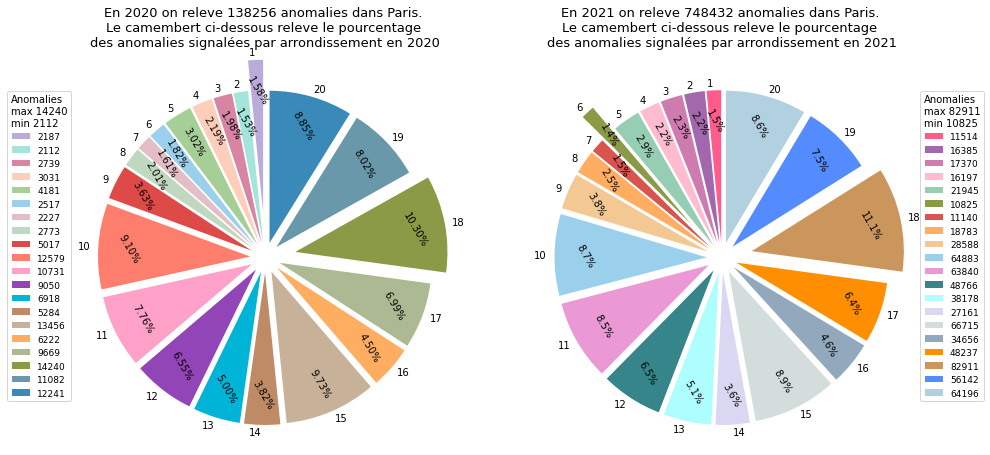

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))





# --------- CAMEMBERT 1 ---------

eclate = (0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1)
colors = ['#BAABDA','#A3E4DB','#D885A3','#FDCEB9','#A6CF98',
          '#9AD0EC','#E3BEC6','#C0D8C0','#DD4A48','#FE7E6D',
          '#FFA1C9','#9145B6','#00B4D8','#BF8B67','#C7B198',
          '#FFAD60','#ACB992','#8B9A46','#6998AB','#398AB9',]

plt.subplot(121)

camemb = axes[0].pie(val2020, labels=cle2020arrond,
         explode=eclate,
         colors=colors,
         autopct='%1.2f%%',
         startangle=90,
         pctdistance = 0.8,     # les pourcentages
         labeldistance = 1.05,# les arrondissements
         )


# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb[2]
for text in x:
    text.set_rotation(-60)
    

axes[0].set_title(f"En 2020 on releve {sum(val2020)} anomalies dans Paris. \nLe camembert ci-dessous \
releve le pourcentage \ndes anomalies signalées par arrondissement en 2020\n").set_fontsize(13)


axes[0].legend(val2020, 
           loc=1, bbox_to_anchor=(0.001,0.95),
           title=f"Anomalies\nmax {val2020_max}\nmin {val2020_min}",
           prop={'size': 9},                    
           )








# --------- CAMEMBERT 2 ---------

eclate2 = (0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1)

colors2 = ['#FF5C8D','#A267AC','#CE7BB0','#FFBCD1','#96CEB4',
          '#8B9A46','#D9534F','#FFAD60','#F3C892','#9AD0EC',
          '#EA99D5','#35858B','#AEFEFF','#D9D7F1','#D3DEDC',
          '#92A9BD','#FF8E00','#CA965C','#548CFF','#B1D0E0',]

plt.subplot(122)

camemb2 = axes[1].pie(val2021, labels=cle2021arrond,
         explode = eclate2,
         colors=colors2,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance = 0.8,     
         labeldistance = 1.05,
         )


# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb2[2]
for text in x:
    text.set_rotation(-60)
    

axes[1].set_title(f"En 2021 on releve {sum(val2021)} anomalies dans Paris. \nLe camembert ci-dessous \
releve le pourcentage \ndes anomalies signalées par arrondissement en 2021\n").set_fontsize(13)


axes[1].legend(val2021, 
            loc=1, bbox_to_anchor=(1.2,0.95),
            title=f"Anomalies\nmax {val2021_max}\nmin {val2021_min}",
            prop={'size': 9},           
            )




plt.savefig('img/Q1_2camembert.png')

plt.show()

### FIN CAMEMBERT DOUBLE ###